# Structural Discovery of Macromolecules

author: Cem Kazan
<br>
date:   02/28/2023

# Structural Discovery of Macromolecules

The main question in structural discovery field is how macro molecules behave in their natural forms and natural environments and how macromolecules stray away from natural behavior. 

# Setup for Data Analysis

  ## Loading Libraries and the Data Frame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set_context('talk')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier

 - For data visualization, I use **matplotlib** or **seaborn** to uncover patterns and relationships in my data.
<br>
 - For data manipulation, I use **pandas** to filter, summarize, and transform my data.
<br>
 - For clustering analysis, I use **scikit-learn** and its **DBSCAN** algorithm to identify clusters within large datasets.
 <br>
 - For deep learning, I use **TensorFlow**  to build and train neural networks 
<br>
 - For dimensionality reduction, I use **scikit-learn** and its **PCA** algorithm to reduce the number of features in my data while retaining as much information as possible

  

## Data Summary

In [3]:
df_input = pd.read_csv('./pdb_data_no_dups.csv')
display(df_input)
df_input.describe(include='all')  

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,932,2.60,101838.68,NaN,NaN,2.38,48.29,NaN,NaN,1991.0
141397,9TNA,T-RNA,X-RAY DIFFRACTION,NaN,0,NaN,24244.34,NaN,NaN,3.17,61.18,NaN,NaN,1986.0
141398,9WGA,LECTIN (AGGLUTININ),X-RAY DIFFRACTION,Protein,342,1.80,34270.22,NaN,NaN,2.50,50.76,NaN,NaN,1990.0
141399,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
count,141401,141399,141401,137636,141401.000000,128589.000000,1.414010e+05,96242,97039.000000,124724.000000,124749.000000,118534,105110.000000,117602.000000
unique,140911,5050,33,13,NaN,NaN,NaN,549,NaN,NaN,NaN,91025,NaN,NaN
top,2FYM,HYDROLASE,X-RAY DIFFRACTION,Protein,NaN,NaN,NaN,"VAPOR DIFFUSION, HANGING DROP",NaN,NaN,NaN,pH 7.5,NaN,NaN
freq,4,20915,126432,127798,NaN,NaN,NaN,53870,NaN,NaN,NaN,361,NaN,NaN
mean,NaN,NaN,NaN,NaN,825.374849,2.263807,1.120790e+05,NaN,290.967713,2.670267,51.353163,NaN,6.788685,2008.922365
std,NaN,NaN,NaN,NaN,2136.461080,1.410878,5.690152e+05,NaN,9.541080,0.783740,10.104561,NaN,2.556819,8.459286
min,NaN,NaN,NaN,NaN,0.000000,0.480000,3.143800e+02,NaN,4.000000,0.000000,0.000000,NaN,0.000000,201.000000
25%,NaN,NaN,NaN,NaN,226.000000,1.800000,2.612856e+04,NaN,290.000000,2.210000,44.370000,NaN,6.000000,2005.000000
50%,NaN,NaN,NaN,NaN,414.000000,2.100000,4.747779e+04,NaN,293.000000,2.490000,50.500000,NaN,7.000000,2010.000000
75%,NaN,NaN,NaN,NaN,820.000000,2.500000,9.408484e+04,NaN,295.000000,2.910000,57.710000,NaN,7.500000,2014.000000


In [4]:
col_names = df_input.columns.tolist()
col_names_str = ', '.join(col_names)

The Structural Protein Sequences data [@structur] frame comprises 14 columns, as indicated by structureId, classification, experimentalTechnique, macromoleculeType, residueCount, resolution, structureMolecularWeight, crystallizationMethod, crystallizationTempK, densityMatthews, densityPercentSol, pdbxDetails, phValue, publicationYear. An examination of the summary statistics revealed the presence of NA and empty values that must be addressed. Additionally, columns deemed irrelevant to our analysis have been removed.  

In [5]:
df_clean = df_input.dropna()
df_clean = df_clean.drop(columns=['publicationYear', 'pdbxDetails'])
df_clean

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.00,2.28,46.06,7.0
27,110D,DNA,X-RAY DIFFRACTION,DNA,6,1.90,2337.73,"VAPOR DIFFUSION, SITTING DROP",277.00,2.90,57.63,6.6
30,111D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7374.83,"VAPOR DIFFUSION, SITTING DROP",277.00,2.29,46.25,6.6
36,113D,DNA,X-RAY DIFFRACTION,DNA,24,2.50,7356.81,"VAPOR DIFFUSION, SITTING DROP",281.00,2.35,47.59,7.4
44,117D,DNA,X-RAY DIFFRACTION,DNA,12,2.55,3663.39,VAPOR DIFFUSION,277.00,3.01,59.09,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
141064,6F6S,VIRAL PROTEIN,X-RAY DIFFRACTION,Protein,497,2.29,58337.03,"VAPOR DIFFUSION, SITTING DROP",293.00,3.83,67.89,5.2
141066,6F73,FLAVOPROTEIN,X-RAY DIFFRACTION,Protein,1148,2.22,128053.03,"VAPOR DIFFUSION, HANGING DROP",294.00,2.90,57.00,5.0
141068,6F8P,VIRAL PROTEIN,X-RAY DIFFRACTION,Protein,316,1.60,34958.86,"VAPOR DIFFUSION, SITTING DROP",298.00,2.47,50.15,7.0
141077,6FAH,FLAVOPROTEIN,X-RAY DIFFRACTION,Protein,2074,3.13,231360.91,"VAPOR DIFFUSION, SITTING DROP",293.15,3.49,64.73,8.5


# Data Analysis

## Molecule Type and Experiment Technique


First thing that need to be considered are the molecule types and the technique used for the experiment to choose ideal data for examination.

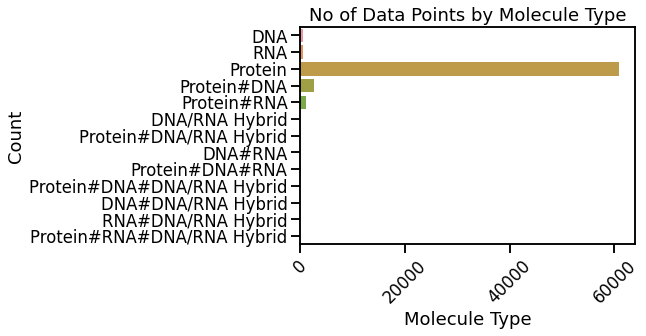

In [6]:
sns.countplot(y='macromoleculeType', data=df_clean)
plt.title("No of Data Points by Molecule Type")
plt.xlabel("Molecule Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

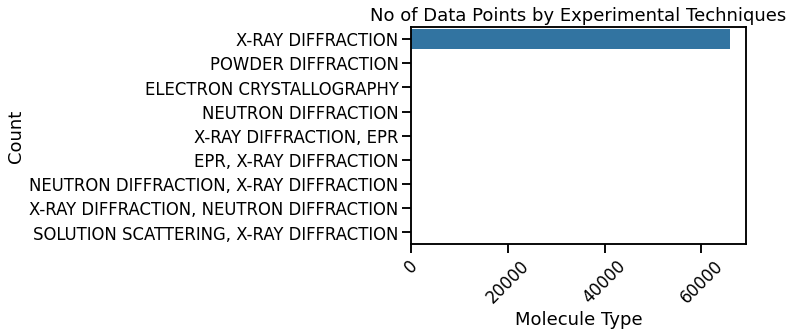

In [7]:

sns.countplot(y='experimentalTechnique', data=df_clean)
plt.title("No of Data Points by Experimental Techniques")
plt.xlabel("Molecule Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [8]:
df_select_1 = df_clean[
    (
        df_clean['macromoleculeType'] == 'Protein'
    ) & (
        df_clean['experimentalTechnique'] == 'X-RAY DIFFRACTION'
    )
].copy()

Due to the large amount of data available for proteins, it was selected as the subject of further analysis. Given the majority of the results are obtained through x-ray diffraction, my focus was specifically directed towards proteins that have been studied using this technique.  

## Effect of Resolution

Majority of the protein structural discoveries uses the x-ray diffraction and one major achievement in discovery is obtaining a resolution (in angstrom units) as close to one as possible.[@warren1990; @whittig1986] This is limited by the physics behind it. To understand this one dimensional data I used histogram to see how it is distributed.  

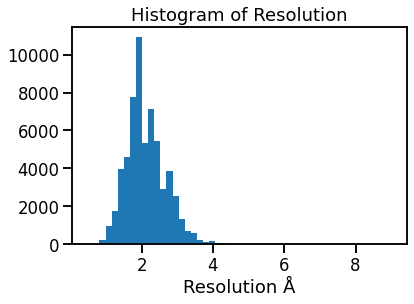

In [9]:
plt.hist(df_select_1['resolution'], bins=50)
plt.title("Histogram of Resolution")
plt.xlabel("Resolution Å")
plt.show()

The histogram of resolution shows that majority of the experiments can resolve structures with a resolution around 2. (As there are more then 60000 data points in my set, the number of bins is selected as 50 to get the details about the distribution more precisely).
<br>
<br>
Investigation of structures with resolution below 2 would give much deeper understanding of the structural features and the underlying physics/chemistry. 
<br>

In [10]:
df_select_2 = df_select_1[
    (
        df_select_1['resolution'] < 2
    )
]


The number of protein structures with a resolution below two are 26248.  

## Effect of Residue Count

Next I wanted to understand how residue count (the number of residue in macromolecules) affects the resolution of the discovered structure. 

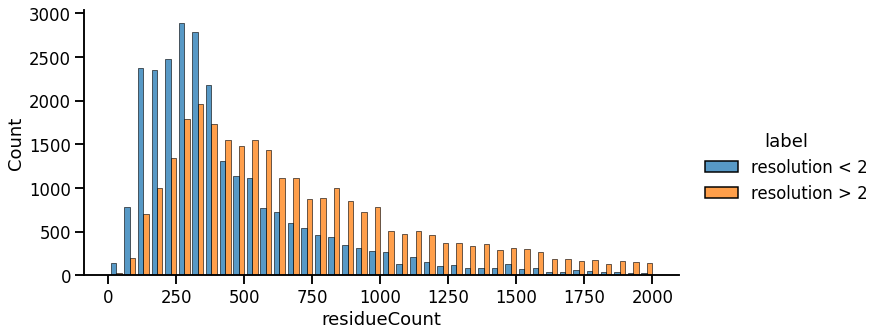

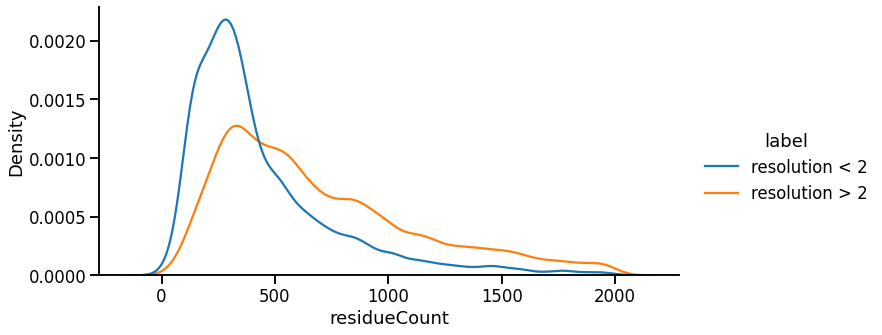

In [11]:
df_protein1 = df_select_1[(df_select_1['resolution'] < 2) & (df_select_1['residueCount'] < 2000)].copy()
df_protein2 = df_select_1[(df_select_1['resolution'] > 2) & (df_select_1['residueCount'] < 2000)].copy()
df_protein1['label'] = 'resolution < 2'
df_protein2['label'] = 'resolution > 2'

df_plot = pd.concat([df_protein1, df_protein2])


sns.displot(
    data=df_plot,
    x='residueCount',
    hue='label',
    kind='hist',
    common_norm=False,
    binwidth=50,
    multiple='dodge',
    shrink=0.8,
    aspect=2,
)
sns.displot(
    data=df_plot,
    x='residueCount',
    hue='label',
    kind='kde',
    common_norm=False,
    aspect=2,
)


The relation between resolution and number of residues is intriguing. The plot shows that number of residues in a protein is a factor in determining the protein resolution. There is a negative correlation between the number of residues and resolution. The lesser the number of residues better the resolution (close to 1). Most of the high resolution structures have less than 500 residues. Thus, I investigated that set. 

In [12]:
df_select_residu = df_select_2[(df_select_2['residueCount'] < 500)]

## Exploring Discrepancies in the Density of Proteins in Crystalline and Soluble Forms

Proteins in solution has shown to display features that are being missed in structural discovery. One of the parameters that has been trusted in protein studies in solution is solution density calculation. On the other side structural discovery utilizes a metric depending on the protein crystals. Now the question is how do proteins act in solution (normal conditions) versus in a crystal lattice (restricted environment) ? Thus I investigated two features from both calculations.   

Text(0.5, 1.0, 'Crystaline vs Solution Density')

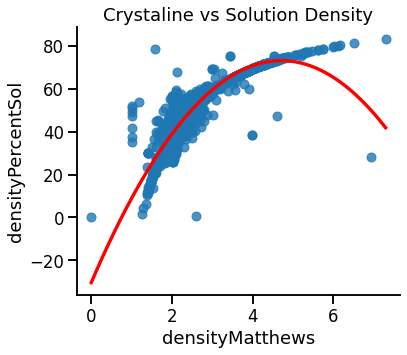

In [13]:
sns.lmplot(
    data = df_select_residu,
    x='densityMatthews',
    y='densityPercentSol',
    order = 2,
    ci = 0,
    line_kws={'color': 'red'},
    aspect=1.2,
    legend = True
)
plt.title("Crystaline vs Solution Density")

The spread of the data in the plot resembles a second degree polynomial fit, hence I added a second degree polynomial fit to capture the underlying principle that correlates these two metrics. However because of the outliers the fit does not recapitulate the data.Thus the outliers needs to be removed.  

### K-means clustering

I used K-means clustering to discover similar data points in the clusters within the two feature space. It can reveal hidden patterns and trends such that it can cluster and separate the data points that don't follow the correct trend.There are thousands of data points in my system therefore I selected k value as 20 to be able to generate unique clusters.

In [14]:
df_density = df_select_residu[['densityMatthews', 'densityPercentSol']].copy()
kmeans_fit = KMeans(n_clusters=10, max_iter=20, n_init=2).fit(df_density)
df_density['clusters'] = kmeans_fit.labels_

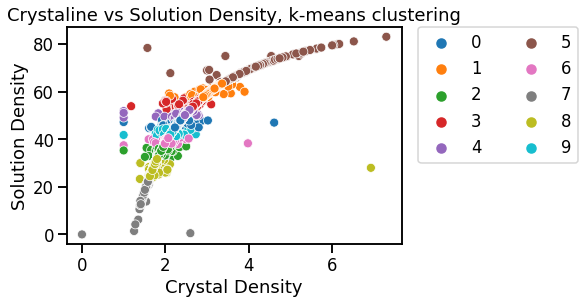

In [15]:
sns.scatterplot(
    data = df_density,
    x='densityMatthews',
    y='densityPercentSol',
    legend = True,
    hue='clusters',
    palette = sns.color_palette('tab10')
)
plt.xlabel('Crystal Density')
plt.ylabel('Solution Density')
plt.title('Crystaline vs Solution Density, k-means clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)

The K-means clustering failed to identify the correct clusters, therefore I used Hierarchical clustering that can identify clusters using agglomerative method which does not require a prior specification of the number of clusters.

### Hierarchical clustering

In [16]:
df_density_2 = df_select_residu[['densityMatthews', 'densityPercentSol']].copy()
hierarchical_cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_density_2)
df_density_2['cluster'] = labels
df_density_2['cluster'] = df_density_2['cluster'].astype(str)

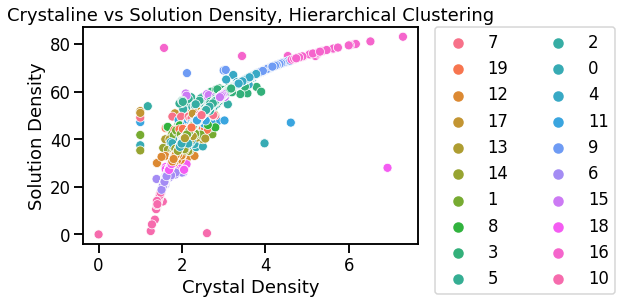

In [17]:
sns.scatterplot(
    data = df_density_2,
    x='densityMatthews',
    y='densityPercentSol',
    legend = True,
    hue='cluster',
)
plt.xlabel('Crystal Density')
plt.ylabel('Solution Density')
plt.title('Crystaline vs Solution Density, Hierarchical Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)

The figures indicate that kmeans and hierarchical clustering was not the best approach to identify the main overlapping points versus the outliers in the data. This data show dense regions around several data points. Therefore a density based clustering approach would be more useful in understanding this data. To achieve that I used dbscan function. DBscan is a density-based clustering algorithm that groups together data points that are close in space and separates points that are far apart. Dbscan is useful because it can find clusters of arbitrary shapes and sizes, unlike k-means and hierarchical clustering which tend to find circular clusters.  

### Density Based Clustering

In [18]:
df_density_3 = df_select_residu[['densityMatthews', 'densityPercentSol']].copy()
dbscan = DBSCAN(eps=0.1, min_samples=1)
result = dbscan.fit_predict(df_density_3)
df_density_3['cluster'] = result
# print(df_density_3['cluster'].value_counts())

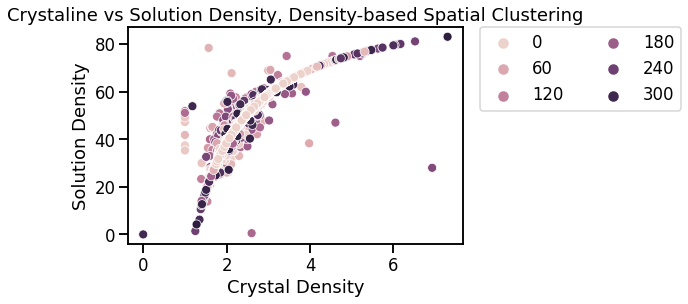

In [19]:
sns.scatterplot(
    data = df_density_3,
    x='densityMatthews',
    y='densityPercentSol',
    legend = True,
    hue='cluster',
)
plt.xlabel('Crystal Density')
plt.ylabel('Solution Density')
plt.title('Crystaline vs Solution Density, Density-based Spatial Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)

Looking at the plot we can clearly see the outliers in our data set. To focus more clearly on the data I choose main cluster and re-plot the data. I added a second degree polynomial fit once again to discover the underlying relation. The polynomial fit now captures more than 95% of the data as shown in the plot below.  

Text(0.5, 1.0, 'Crystaline vs Solution Density, Density-based Spatial Clustering')

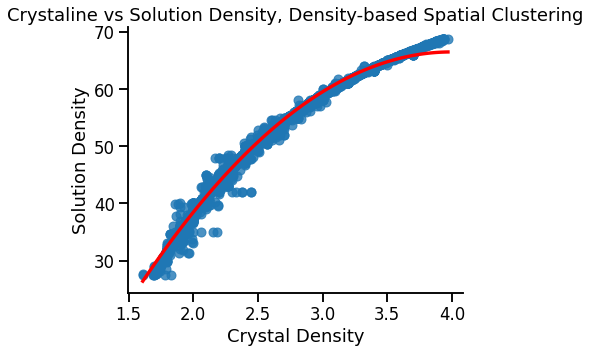

In [20]:
df_density_4 = df_density_3[df_density_3['cluster'] == 0]


sns.lmplot(
    data = df_density_4,
    x='densityMatthews',
    y='densityPercentSol',
    order = 2,
    ci = 0,
    line_kws={'color': 'red'},
    aspect=1.2,
   
)
plt.title("Crystaline vs Solution Density")
plt.xlabel('Crystal Density')
plt.ylabel('Solution Density')
plt.title('Crystaline vs Solution Density, Density-based Spatial Clustering')



The results of this analysis demonstrate that through the utilization of various machine learning techniques, it is possible to identify and decipher fundamental relationships within a data set. This study highlights the challenges of achieving results that resemble natural phenomena using these techniques, with only 26% of the data points, equivalent to only 26% of the experiments, resulting in naturally occurring behavior that captures the correct underlying fundamentals.

So far focused on only several features from the dataset and filtering based on physics based principals I was able to distinguish different protein structures from each other. However, the dataset contains vast number of features that could be understood in a cohesive manner. In example for every protein 5 features could be analyzed at the same time to achive higher clarity in its natural behaviour relative with other proteins in the set. Several mathematical approaches could be utilized to achieve this. In the next chapters I will apply several diffrent methods to analyze the data. This will hopefully provide a better understanding of the data and potentially be able to distinguish proteins with similar characteristics from the ones that behave differently.

# Principal Component Analysis

PCA is a technique that helps us understand complex datasets by simplifying them into a smaller number of variables (dimension reduction). The most significant links and patterns in the data are found, and new variables are then created to capture those relationships and patterns. These new variables, referred to as principle components, are simpler to use and can provide us with new perspectives on the underlying structure of the data.

First I will define a python function that takes a dataframe with several features and outputs its principal components.

In [21]:
def pca_df(df):
  # first we need to scale the values to avoid bias
    x = StandardScaler(with_mean=True, with_std=False).fit_transform(df.values)
    # now we do pca model and fit
    pca = PCA()
    principal_components = pca.fit_transform(x)
    print(pca.singular_values_)
    principal_df = pd.DataFrame(
        data=principal_components,
        index=df.index,
        columns=['PC{}'.format(a) for a in range(1, principal_components.shape[1] + 1)]
    )
    return principal_df


In [22]:
df_clean

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,phValue
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.00,2.28,46.06,7.0
27,110D,DNA,X-RAY DIFFRACTION,DNA,6,1.90,2337.73,"VAPOR DIFFUSION, SITTING DROP",277.00,2.90,57.63,6.6
30,111D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7374.83,"VAPOR DIFFUSION, SITTING DROP",277.00,2.29,46.25,6.6
36,113D,DNA,X-RAY DIFFRACTION,DNA,24,2.50,7356.81,"VAPOR DIFFUSION, SITTING DROP",281.00,2.35,47.59,7.4
44,117D,DNA,X-RAY DIFFRACTION,DNA,12,2.55,3663.39,VAPOR DIFFUSION,277.00,3.01,59.09,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
141064,6F6S,VIRAL PROTEIN,X-RAY DIFFRACTION,Protein,497,2.29,58337.03,"VAPOR DIFFUSION, SITTING DROP",293.00,3.83,67.89,5.2
141066,6F73,FLAVOPROTEIN,X-RAY DIFFRACTION,Protein,1148,2.22,128053.03,"VAPOR DIFFUSION, HANGING DROP",294.00,2.90,57.00,5.0
141068,6F8P,VIRAL PROTEIN,X-RAY DIFFRACTION,Protein,316,1.60,34958.86,"VAPOR DIFFUSION, SITTING DROP",298.00,2.47,50.15,7.0
141077,6FAH,FLAVOPROTEIN,X-RAY DIFFRACTION,Protein,2074,3.13,231360.91,"VAPOR DIFFUSION, SITTING DROP",293.15,3.49,64.73,8.5


In [23]:
df_PCA_input= df_clean[[
    'structureId',
    'residueCount','resolution','structureMolecularWeight',
    'crystallizationTempK','densityMatthews','densityPercentSol','phValue'
]]
df_PCA_input.set_index('structureId', inplace=True)
display(df_PCA_input)

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
structureId,,,,,,,
102D,24,2.20,7637.17,277.00,2.28,46.06,7.0
110D,6,1.90,2337.73,277.00,2.90,57.63,6.6
111D,24,2.25,7374.83,277.00,2.29,46.25,6.6
113D,24,2.50,7356.81,281.00,2.35,47.59,7.4
117D,12,2.55,3663.39,277.00,3.01,59.09,6.5
...,...,...,...,...,...,...,...
6F6S,497,2.29,58337.03,293.00,3.83,67.89,5.2
6F73,1148,2.22,128053.03,294.00,2.90,57.00,5.0
6F8P,316,1.60,34958.86,298.00,2.47,50.15,7.0


In [24]:
principal_df = pca_df(df_PCA_input)
print(principal_df)

df_PCA_output = pd.concat([df_PCA_input, principal_df], axis=1)
print(df_PCA_output)


[7.41476344e+07 1.63878371e+05 2.56273553e+03 2.29696160e+03
 3.31008249e+02 1.27457167e+02 6.82179473e+01]
                       PC1         PC2        PC3        PC4       PC5  \
structureId                                                              
102D         -92952.188408  302.324139   1.442777  14.778515  0.219619   
110D         -98251.650145  292.661844  12.073082  10.172944 -0.197828   
111D         -93214.524838  300.955409   1.617215  14.702583 -0.179696   
113D         -93232.544587  300.858965   1.262695  10.496945  0.626207   
117D         -96925.976875  293.574242  13.425705   9.584843 -0.288906   
...                    ...         ...        ...        ...       ...   
6F6S         -42250.550792   93.752619  14.588273  -8.368569 -1.597463   
6F73          27467.896436 -193.569594   3.390525  -4.616139 -1.794568   
6F8P         -65629.346967  152.835223  -3.529095  -5.956155  0.218748   
6FAH         130779.201212 -580.698352   9.772903  -6.473497  1.696199   
7BNA

The first two principal components in PCA are often the most important because they capture the largest amount of variation in the original dataset. This means that they contain the most information about the underlying patterns and relationships in the data. By analyzing these components, we can gain a better understanding of the key factors that are driving the variation in the dataset, and use this information to make better decisions or predictions. Essentially, the first two components give us a high-level overview of the data and provide a foundation for deeper analysis.

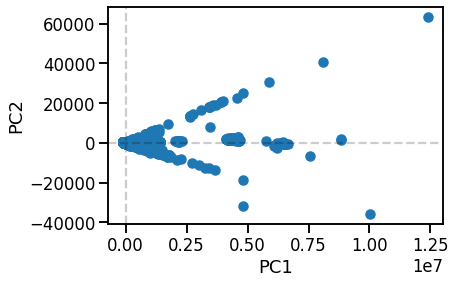

In [25]:
plt.scatter(
    x= df_PCA_output['PC1'],
    y= df_PCA_output['PC2'],
)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.2)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

By plotting the first two principal components using matplotlib scatter plot we can identify data points that are most deviant and the ones that are similar to eachother. Here intriguingly PC2 identifies and seperates outliers very clearly. Thus first I will investigate the differences between these clusters.

In [26]:
df_PC2_1 = df_PCA_output [ (df_PCA_output['PC2'] > 0)]
df_PC2_2 = df_PCA_output [ (df_PCA_output['PC2'] < 0)]

In [27]:
df_PC2_1.mean()

residueCount                  435.409737
resolution                      2.030232
structureMolecularWeight    60391.695490
crystallizationTempK          291.161979
densityMatthews                 2.604698
densityPercentSol              50.299365
phValue                         6.773873
PC1                        -40196.234610
PC2                           166.088967
PC3                            -0.758308
PC4                             0.285095
PC5                            -0.008981
PC6                            -0.056183
PC7                             0.013720
dtype: float64

In [28]:
df_PC2_2.mean()

residueCount                  1637.439114
resolution                       2.429300
structureMolecularWeight    188973.750474
crystallizationTempK           291.013852
densityMatthews                  2.836193
densityPercentSol               54.425100
phValue                          6.818693
PC1                          88390.341108
PC2                           -365.224768
PC3                              1.667497
PC4                             -0.626916
PC5                              0.019749
PC6                              0.123545
PC7                             -0.030170
dtype: float64

By looking at the mean values of each feature in two clusters separated by PC2, we observe a marginal difference in the number of residues of a protein (residueCount). The first cluster have an average residue count of 435, while the second cluster has an average of 1637. Following, the molecular weights of the protein (structureMolecularWeight) shows a similar trend. One of the most important components in structural discovery , resolution , shows distinction in these two clusters. We have previously seen the effect of residue count on resolution in this study and PCA was able to identify this difference robustly. The first cluster with an average less number of residues shows an average resolution of 2 angstrom, while the second cluster containing proteins with a large number of residues has an average of 2.4 angstrom.  On the other hand the second principal component was not able to distinguish the difference of densities of proteins.

In [29]:
df_PC1_1 = df_PCA_output [ (df_PCA_output['PC1'] > 0)]
df_PC1_2 = df_PCA_output [ (df_PCA_output['PC1'] < 0)]
print(df_PC1_1.mean())

residueCount                  2133.092425
resolution                       2.520103
structureMolecularWeight    276029.527503
crystallizationTempK           291.091253
densityMatthews                  2.904525
densityPercentSol               55.344906
phValue                          6.818821
PC1                         175447.519219
PC2                           -406.775345
PC3                              1.998317
PC4                             -0.883510
PC5                              0.010809
PC6                              0.154124
PC7                             -0.024116
dtype: float64


In [30]:
print(df_PC1_2.mean())

residueCount                  399.138125
resolution                      2.041178
structureMolecularWeight    45903.344035
crystallizationTempK          291.123286
densityMatthews                 2.606167
densityPercentSol              50.418430
phValue                         6.778241
PC1                        -54684.578158
PC2                           126.786279
PC3                            -0.622848
PC4                             0.275378
PC5                            -0.003369
PC6                            -0.048038
PC7                             0.007517
dtype: float64


By investigating the first principal component we again see a similar trend as PC2. Thus I looked into the third principal component. 

In [31]:
df_PC3_1 = df_PCA_output [ (df_PCA_output['PC3'] > 0)]
df_PC3_2 = df_PCA_output [ (df_PCA_output['PC3'] < 0)]
print(df_PC3_1.mean())

residueCount                   848.059225
resolution                       2.357352
structureMolecularWeight    103099.207839
crystallizationTempK           288.626577
densityMatthews                  3.170135
densityPercentSol               59.624731
phValue                          6.791331
PC1                           2512.849230
PC2                            -23.800663
PC3                              8.330472
PC4                             -0.898369
PC5                             -0.004923
PC6                             -0.007954
PC7                             -0.032932
dtype: float64


In [32]:
print(df_PC3_2.mean())

residueCount                  779.146510
resolution                      1.979356
structureMolecularWeight    98405.916627
crystallizationTempK          293.275799
densityMatthews                 2.249158
densityPercentSol              44.615448
phValue                         6.784893
PC1                         -2180.737672
PC2                            20.655040
PC3                            -7.229472
PC4                             0.779636
PC5                             0.004272
PC6                             0.006902
PC7                             0.028579
dtype: float64


The average of the features when separating the data by its third principal componant shows that the density of a protein in solution (densityPercentSol) is different in two clusters. Following, the density of a protein in crystal (densityMatthews) shows a similar trend. We have previously shown the correlation between the densities in solution and crystal, and we are observing the same distinction with PC3 clustering of the data. The crystal and solution densities for the first and second cluster of PC3 is 3.1, 59.6, and 2.2, 44.6, respectively.

By utilizing PCA, we observe that the features residue count, resolution and molecular weight are tied together within the second and first principal component, while density related features are tied to the third principal component. This implies that one can harness the power of dimensionality reduction techniques to identify the physical characteristics of proteins and distinguish, and potentially predict behaviours of new proteins by looking into several of their features.

# Non-Linear Data Analyses with Artificial Neural Network Treatment

Previous analyses have shown great promise in deciphering the structural data of proteins. However, using all the features of the data together most of the methods uses functions in a linear fashion and this challenges and restricts the possible highly accurate understanding and predictions of the data. Hence, I wanted to follow a more non linear approach which are Artificial Neural Networks. In this study I want to explore the data and try to pin down the underlying physics to be able to classify proteins by their structural data. One interesting way to achieve this is using unsupervised learning. Unsupervised learning is useful when we do not already have the defining labels for the data and trying to learn the representations of the data which will provide us with the classification of the proteins in this study. Autoencoders, which are a type of neural networks, are often used for unsupervised learning tasks, meaning that the data used to train the autoencoder does not have any labels. Instead, the autoencoder tries to learn the underlying structure of the data without any guidance from an outside source or predefined criteria. Once the autoencoder is trained, it can be used for various classifications of proteins. It is composed of two parts: an encoder and a decoder. The encoder takes the input data and compresses it into a lower-dimensional representation, and the decoder takes this compressed representation and reconstructs the data as closely to the original as possible. This systematic algorithm learns the most important parts of the data and uses it to reconstruct it. Here I apply a simple autoencoder to understand the structural data from structural discovery.


In [33]:
# this function separates data as features and labels. 
# This is not required in the current case as it is unsupervised but 
# the function splitting the data requries labels, hence
# I used dummy data as labels to use it later on splitting.
def prepare_xy(dataset, x_label_list, y_label_list):
  x = dataset.loc[:, x_label_list]
  y = dataset.loc[:, y_label_list]
  print('x: {}'.format(x.shape))
  print('y: {}'.format(y.shape))
  return x, y

In [34]:
# the data going into a neural network needs to be renormalized for it to be 
# functioning better, meaning a data distributed evenly between negative and 
# positive values with a mean around zero, would make multiplying and summing
# up the weights and values much easire, leading to shorter convergance of 
# neural network training and easier learning.
def scaler_1(x):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  sc.fit(x)
  xs = sc.transform(x)
  return sc, xs

In [35]:
# This function is used to split the data into training and testing.
# This is an important step as I am training the model with part of my data,
# and testing the ability of my model in capturing correct featrues with
# previously unseen data for the neural network.
# I am using 90% training, 10% testing splitting.
# 85% to 15% is also a common way to split, but as I have thousands of data
# points, I would already have enough data points to test the neural network with.
def splitter_1(x, y, test_size=0.1):
  from sklearn.model_selection import train_test_split
  display(y.apply(pd.value_counts))
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
  print('x_train: {}'.format(x_train.shape))
  display(x_train)
  print('x_test: {}'.format(x_test.shape))
  display(x_test)
  print('y_train: {}'.format(y_train.shape))
  display(y_train)
  display(y_train.apply(pd.value_counts))
  print('y_test: {}'.format(y_test.shape))
  display(y_test)
  display(y_test.apply(pd.value_counts))
  return x_train, x_test, y_train, y_test

In [36]:
# Here I build the architecture of my neural net
def build_keras_model(input_dim, output_dim):
  classifier = tf.keras.Sequential()
  # Input layer takes the input data and passes it to hidden layers
  classifier.add(layers.Dense(
      units=(0.6 * input_dim),
      kernel_initializer=tf.initializers.he_uniform(),
      activation=tf.keras.activations.relu,
      input_dim = input_dim
      )
  )
  classifier.add(layers.Dense(
      units=(0.2 * input_dim),
      kernel_initializer=tf.initializers.he_uniform(),
      activation=tf.keras.activations.relu
      )
  )
# The number of nodes in each layer decreases initially and then increases.
# this is to reduce the dimensions as much as possible and try to 
# recapitulate the iniital data values later
  classifier.add(layers.Dense(
      units=(0.6 * input_dim),
      kernel_initializer=tf.initializers.he_uniform(),
      activation=tf.keras.activations.relu
      )
  )
#  The final layer is the output layer which has a sigmoid function.
# Sigmoid is important here as it give a distribution of values between 0 and 1,
# and these values can be translated back into real values later.
  classifier.add(layers.Dense(
      units=output_dim,
      kernel_initializer=tf.initializers.glorot_uniform(),
      activation=tf.keras.activations.sigmoid
      )
  )
# the last part is the seelction of minimizer and loss function. Adam is a 
# common minimizer and MSE is a robust function to check how much the system is 
# closer to the original data
  classifier.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.MeanSquaredError(),
      metrics=[
              tf.keras.metrics.Accuracy(),
              tf.keras.metrics.BinaryAccuracy(),
              tf.keras.metrics.AUC(),
              tf.keras.metrics.TruePositives(),
              tf.keras.metrics.TrueNegatives(),
              tf.keras.metrics.FalsePositives(),
              tf.keras.metrics.FalseNegatives()
              ]
  )
  return classifier

In [37]:
# this function is to do the fitting of the data on to the model which is the 
# neural network architecture built here.
def train_classifier(x_train, x_test, y_train, y_test, keras_model, train_num=10):
  for count1 in range(0, 10):
    keras_model.fit(x_train, y_train, batch_size = 10, epochs=(train_num - 1), verbose=0)
    keras_model.fit(x_train, y_train, batch_size = 10, epochs=1, validation_data=(x_test, y_test), verbose=2)

In [38]:
# this function is used to make predictions on the test data set.
def predict_1(keras_model, x_test):
  y_pred = keras_model.predict(x_test)
  return y_pred

In [39]:
# Here we are preparing the input data and splitting it into train and test
x1, y1 = prepare_xy(
    df_PCA_output, 
    [
    'residueCount','resolution','structureMolecularWeight',
    'crystallizationTempK','densityMatthews','densityPercentSol','phValue'
    ], 
    ['PC1']
    )
sc, x1s = scaler_1(x1)
x1s = pd.DataFrame(index=x1.index, columns=x1.columns, data=x1s)
x1_train, x1_test, y1_train, y1_test = splitter_1(x1s, y1, 0.1)

x: (65886, 7)
y: (65886, 1)


,PC1
-69696.566349,9
-40586.367926,7
-86536.188918,6
-86537.168902,5
-86554.198676,4
...,...
-79200.268356,1
-78995.971125,1
-83953.497492,1
-84714.907141,1


x_train: (59297, 7)


,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
structureId,,,,,,,
1LL7,-0.016600,-0.265744,-0.045554,0.754795,-0.633587,-0.675803,0.552108
1FV2,-0.207255,0.591600,-0.154751,0.206597,-0.165904,0.041208,1.327414
5GSU,0.285271,1.620412,0.346139,0.206597,0.018334,0.753205,-0.610851
4DFI,-0.417465,-0.608681,-0.300258,-0.012683,-1.129614,-1.699674,1.327414
3REH,0.277938,0.591600,0.339800,-0.231962,-0.010010,0.238762,-0.610851
...,...,...,...,...,...,...,...
3L5H,-0.135759,2.477755,-0.101584,0.754795,4.170789,2.661558,-0.610851
4JVR,-0.319693,-0.780150,-0.227082,-1.547638,-0.704448,-0.809177,-1.386157
2G75,0.064062,0.214368,-0.010429,0.206597,-0.463521,-0.393009,1.327414


x_test: (6589, 7)


,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
structureId,,,,,,,
1Y7A,0.053063,-0.660122,-0.019047,0.206597,0.755289,0.622840,2.102720
4V9D,12.294720,1.448943,14.615002,-0.012683,0.882838,1.116223,-0.223198
3EII,0.012732,0.162928,-0.026963,0.754795,-0.265110,-0.103197,-0.223198
2Q67,-0.356357,0.248662,-0.259335,0.754795,3.150391,2.335643,0.939761
3MJ3,-0.469406,1.620412,-0.298657,0.206597,0.726944,0.982849,0.552108
...,...,...,...,...,...,...,...
1RK5,-0.192589,-0.608681,-0.162419,0.425876,0.641911,0.884574,-0.920974
3RL7,-0.063041,0.248662,-0.076680,-0.451241,-0.831998,-1.054866,0.552108
1Q7Q,0.196054,1.620412,0.092361,-1.547638,3.802312,2.552251,-0.843443


y_train: (59297, 1)


,PC1
structureId,
1LL7,-13158.819632
1FV2,-44703.197913
5GSU,99988.557954
4DFI,-86736.370547
3REH,98157.400246
...,...
3L5H,-29344.776423
4JVR,-65597.913477
2G75,-3011.869117


,PC1
-69696.566349,9
-40586.367926,7
-86536.188918,6
-86537.168902,5
241431.298559,4
...,...
-14268.240232,1
-382.630995,1
-63564.094675,1
-77513.224733,1


y_test: (6589, 1)


,PC1
structureId,
1Y7A,-5.501349e+03
4V9D,4.221809e+06
3EII,-7.788452e+03
2Q67,-7.491483e+04
3MJ3,-8.627429e+04
...,...
1RK5,-4.691825e+04
3RL7,-2.215034e+04
1Q7Q,2.668109e+04


,PC1
-66774.258365,2
-86554.198676,2
-5501.349088,1
93348.899293,1
-83709.287793,1
...,...
-2890.129007,1
-44485.310474,1
-83900.786425,1
132753.140476,1


In [40]:
# Summary of the neural net architecture with the number of nodes 
# scaled based on the number of input features
keras_model_1 = build_keras_model(x1s.shape[1], x1s.shape[1])
keras_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 dense_2 (Dense)             (None, 4)                 8         
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Training the model, This takes time.
# In the training the loss function value is an important paramater to follow
# as it gives an idea about how close the final representation is to 
# the original data. The loss should decrease over multiple iterations (epochs)
train_classifier(
    x1_train, x1_test, 
    x1_train, x1_test, 
    keras_model_1, train_num=10,
    )

5930/5930 - 14s - loss: 0.7948 - accuracy: 0.0000e+00 - binary_accuracy: 0.0000e+00 - auc: 0.0000e+00 - true_positives: 52065.0000 - true_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 363014.0000 - val_loss: 0.7329 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_true_positives: 5946.0000 - val_true_negatives: 0.0000e+00 - val_false_positives: 0.0000e+00 - val_false_negatives: 40177.0000 - 14s/epoch - 2ms/step
5930/5930 - 15s - loss: 0.7923 - accuracy: 0.0000e+00 - binary_accuracy: 0.0000e+00 - auc: 0.0000e+00 - true_positives: 51471.0000 - true_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - false_negatives: 363608.0000 - val_loss: 0.7310 - val_accuracy: 0.0000e+00 - val_binary_accuracy: 0.0000e+00 - val_auc: 0.0000e+00 - val_true_positives: 5763.0000 - val_true_negatives: 0.0000e+00 - val_false_positives: 0.0000e+00 - val_false_negatives: 40360.0000 - 15s/epoch - 3ms/step
5930/5930 - 14s - loss: 0.7911 - accuracy:

In [42]:
# After the model is trained we can make predictions. Here the predictions are on training set
# meaining the neural network already learned this data and should be very good at predciting it again.
x1_train_pred = predict_1(keras_model_1, x1_train)
x1_train_pred = pd.DataFrame(index=x1_train.index, columns=x1_train.columns, data=x1_train_pred)
display(x1_train_pred)

1854/1854 [==============================] - 3s 2ms/step


,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
structureId,,,,,,,
1LL7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
1FV2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
5GSU,1.604278e-02,9.999959e-01,4.211403e-03,2.202764e-26,0.999997,0.999996,5.847347e-01
4DFI,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
3REH,0.000000e+00,2.045232e-15,0.000000e+00,0.000000e+00,0.040100,0.208307,3.931682e-24
...,...,...,...,...,...,...,...
3L5H,6.441210e-08,9.997588e-01,3.130737e-10,5.168652e-31,0.999988,0.999988,1.164974e-02
4JVR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
2G75,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00


In [43]:
# prediction using test data subset.
x1_test_pred = predict_1(keras_model_1, x1_test)
x1_test_pred = pd.DataFrame(index=x1_test.index, columns=x1_test.columns, data=x1_test_pred)
display(x1_test_pred)

206/206 [==============================] - 1s 2ms/step


,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
structureId,,,,,,,
1Y7A,0.000000e+00,3.027744e-13,0.000000e+00,0.000000e+00,0.189679,0.540786,1.382845e-21
4V9D,9.999892e-01,9.999960e-01,9.997815e-01,2.726076e-02,0.999985,0.999977,2.406809e-01
3EII,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
2Q67,8.911152e-04,9.999894e-01,9.137367e-05,1.826831e-27,0.999996,0.999995,3.154294e-01
3MJ3,6.960497e-07,9.998894e-01,7.240248e-09,3.972193e-30,0.999991,0.999990,2.858829e-02
...,...,...,...,...,...,...,...
1RK5,0.000000e+00,7.112930e-11,0.000000e+00,0.000000e+00,0.605994,0.858229,8.360880e-19
3RL7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
1Q7Q,1.230201e-05,9.999568e-01,3.205005e-07,4.653240e-29,0.999994,0.999993,8.153911e-02


In [44]:
# obtaining real values, or observables by using the final representation 
# calculated by the neural network.
x1_train_inverse = pd.DataFrame(index=x1_train.index, columns=x1_train.columns, data=sc.inverse_transform(x1_train))
x1_train_pred_inverse = pd.DataFrame(index=x1_train_pred.index, columns=x1_train_pred.columns, data=sc.inverse_transform(x1_train_pred))
x1_test_inverse = pd.DataFrame(index=x1_test.index, columns=x1_test.columns, data=sc.inverse_transform(x1_test))
x1_test_pred_inverse = pd.DataFrame(index=x1_test_pred.index, columns=x1_test_pred.columns, data=sc.inverse_transform(x1_test_pred))

In [45]:
# displaying the newly calcualted features.
display(x1_train_inverse)
display(x1_train_pred_inverse)
display(x1_test_inverse)
display(x1_test_pred_inverse)

,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
structureId,,,,,,,
1LL7,784.0,2.00,87427.66,298.00,2.23,44.85,7.5
1FV2,472.0,2.50,55884.48,293.00,2.56,52.00,8.5
5GSU,1278.0,3.10,200574.00,293.00,2.69,59.10,6.0
4DFI,128.0,1.80,13852.53,291.00,1.88,34.64,8.5
3REH,1266.0,2.50,198742.88,289.00,2.67,53.97,6.0
...,...,...,...,...,...,...,...
3L5H,589.0,3.60,71242.50,298.00,5.62,78.13,6.0
4JVR,288.0,1.70,34990.44,277.00,2.18,43.52,5.0
2G75,916.0,2.28,97574.06,293.00,2.35,47.67,8.5


,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
structureId,,,,,,,
1LL7,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884
1FV2,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884
5GSU,837.418152,2.738175,101803.046875,291.115662,3.382668,61.560989,7.542082
4DFI,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884
3REH,811.164795,2.154981,100586.515625,291.115662,2.705358,53.666302,6.787884
...,...,...,...,...,...,...,...
3L5H,811.164917,2.738037,100586.515625,291.115662,3.382662,61.560902,6.802910
4JVR,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884
2G75,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884


,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
structureId,,,,,,,
1Y7A,898.0,1.77,95084.64,293.0,3.21,57.80,9.5
4V9D,20931.0,3.00,4322348.00,291.0,3.30,62.72,6.5
3EII,832.0,2.25,92797.85,298.0,2.49,50.56,6.5
2Q67,228.0,2.30,25673.71,298.0,4.90,74.88,8.0
3MJ3,43.0,3.10,14315.06,293.0,3.19,61.39,7.5
...,...,...,...,...,...,...,...
1RK5,496.0,1.80,53669.27,295.0,3.13,60.41,5.6
3RL7,708.0,2.30,78436.41,287.0,2.09,41.07,7.5
1Q7Q,1132.0,3.10,127266.30,277.0,5.36,77.04,5.7


,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue
structureId,,,,,,,
1Y7A,811.164795,2.154981,100586.515625,291.115662,2.810902,56.981762,6.787884
4V9D,2447.608398,2.738176,389388.375000,291.364319,3.382659,61.560799,7.098317
3EII,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884
2Q67,812.623047,2.738172,100612.914062,291.115662,3.382667,61.560978,7.194729
3MJ3,811.165894,2.738113,100586.515625,291.115662,3.382664,61.560928,6.824757
...,...,...,...,...,...,...,...
1RK5,811.164795,2.154981,100586.515625,291.115662,3.104656,60.147289,6.787884
3RL7,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884
1Q7Q,811.184937,2.738153,100586.609375,291.115662,3.382665,61.560951,6.893054


In [46]:
# reindexing and relabeling for analyses in the next part
x1_train_inverse.reset_index(inplace=True)
x1_train_inverse['label'] = 'train'
x1_train_pred_inverse.reset_index(inplace=True)
x1_train_pred_inverse['label'] = 'train_pred'
x1_test_inverse.reset_index(inplace=True)
x1_test_inverse['label'] = 'test'
x1_test_pred_inverse.reset_index(inplace=True)
x1_test_pred_inverse['label'] = 'test_pred'

In [47]:
df_train_final = pd.concat([x1_train_inverse, x1_train_pred_inverse])
df_train_final.reset_index(inplace=True)
df_test_final = pd.concat([x1_test_inverse, x1_test_pred_inverse])
df_test_final.reset_index(inplace=True)

In [48]:
display(df_train_final)
display(df_test_final)

,index,structureId,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,label
0,0,1LL7,784.000000,2.000000,87427.660000,298.000000,2.230000,44.850000,7.500000,train
1,1,1FV2,472.000000,2.500000,55884.480000,293.000000,2.560000,52.000000,8.500000,train
2,2,5GSU,1278.000000,3.100000,200574.000000,293.000000,2.690000,59.100000,6.000000,train
3,3,4DFI,128.000000,1.800000,13852.530000,291.000000,1.880000,34.640000,8.500000,train
4,4,3REH,1266.000000,2.500000,198742.880000,289.000000,2.670000,53.970000,6.000000,train
...,...,...,...,...,...,...,...,...,...,...
118589,59292,3L5H,811.164917,2.738037,100586.515625,291.115662,3.382662,61.560902,6.802910,train_pred
118590,59293,4JVR,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884,train_pred
118591,59294,2G75,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884,train_pred
118592,59295,5UDV,811.164795,2.154981,100586.515625,291.115662,2.677063,51.589073,6.787884,train_pred


,index,structureId,residueCount,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,label
0,0,1Y7A,898.000000,1.770000,9.508464e+04,293.000000,3.210000,57.800000,9.500000,test
1,1,4V9D,20931.000000,3.000000,4.322348e+06,291.000000,3.300000,62.720000,6.500000,test
2,2,3EII,832.000000,2.250000,9.279785e+04,298.000000,2.490000,50.560000,6.500000,test
3,3,2Q67,228.000000,2.300000,2.567371e+04,298.000000,4.900000,74.880000,8.000000,test
4,4,3MJ3,43.000000,3.100000,1.431506e+04,293.000000,3.190000,61.390000,7.500000,test
...,...,...,...,...,...,...,...,...,...,...
13173,6584,1RK5,811.164795,2.154981,1.005865e+05,291.115662,3.104656,60.147289,6.787884,test_pred
13174,6585,3RL7,811.164795,2.154981,1.005865e+05,291.115662,2.677063,51.589073,6.787884,test_pred
13175,6586,1Q7Q,811.184937,2.738153,1.005866e+05,291.115662,3.382665,61.560951,6.893054,test_pred
13176,6587,1HZT,811.164795,2.154981,1.005865e+05,291.115662,2.677063,51.589073,6.787884,test_pred


After the training of the neural net is completed, I looked at the predictions of the network based on the training data subset and compared it to the original values. I do it by plotting their distributions and also comparing the means of the data (original vs prediction). The mean values show that the neural network can learn the hidden features of the data well enough to make predictions very close to original values. However, when the distributions of each feature is inspected we can recognize that neural network learned important features that are already closer to the mean values of the original data (peak of the distributions of blue curves), meaning the orange curve (distribution of predictions) have peak or peaks that are closer to the peaks of the original data. This is an interesting observation as the neural network show more than one peak for most of the features, implying that there might be two separate clusters of proteins in the data set.

residueCount means for training data, original:812.90 <-> prediction:896.42
resolution means for training data, original:2.16 <-> prediction:2.25
structureMolecularWeight means for training data, original:100858.02 <-> prediction:112630.61
crystallizationTempK means for training data, original:291.09 <-> prediction:291.12
densityMatthews means for training data, original:2.68 <-> prediction:2.87
densityPercentSol means for training data, original:51.58 <-> prediction:54.79
phValue means for training data, original:6.79 <-> prediction:6.87


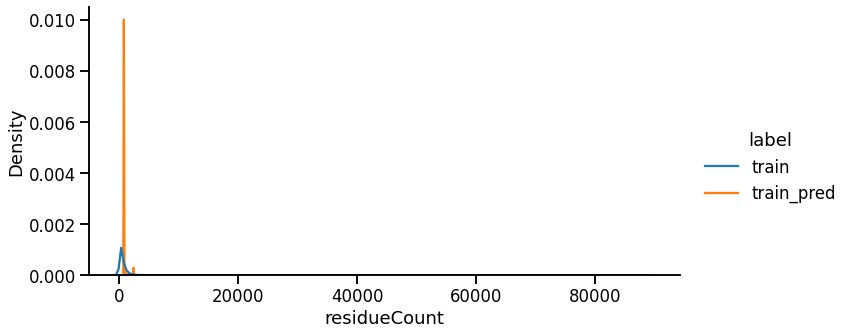

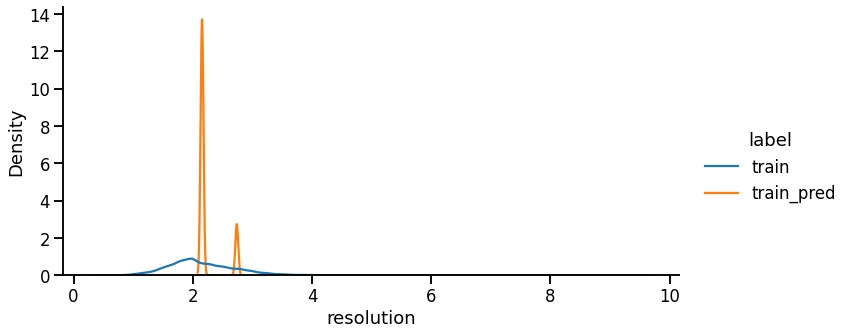

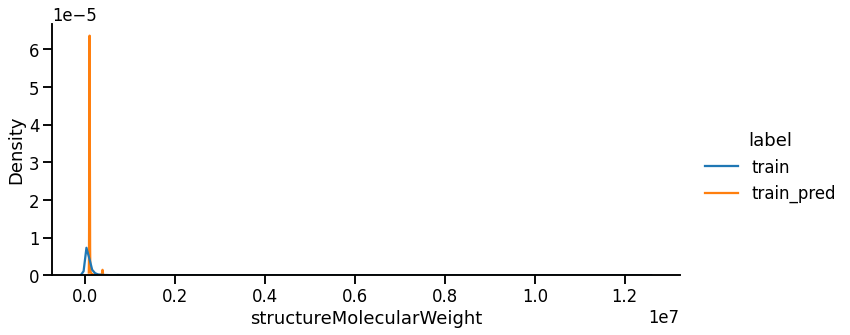

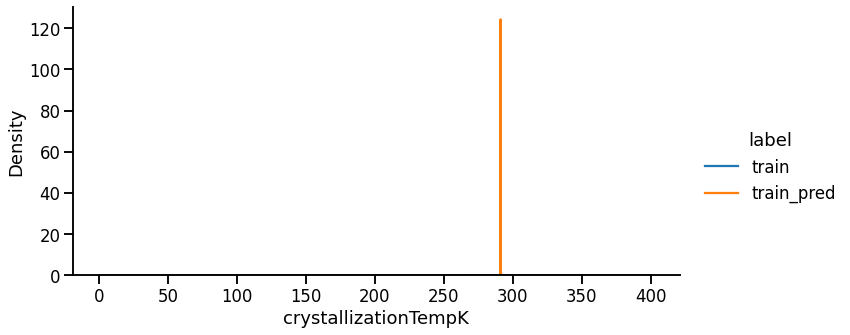

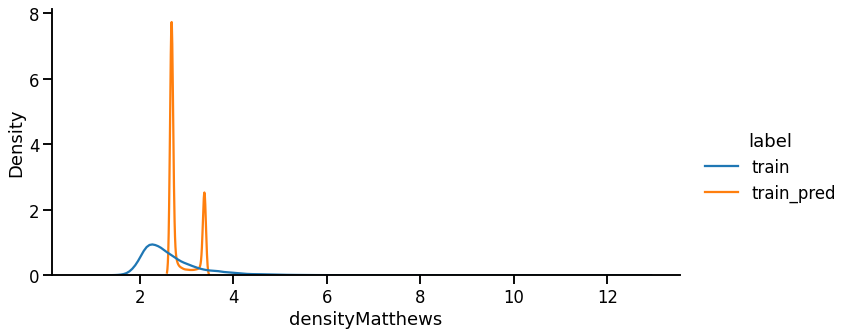

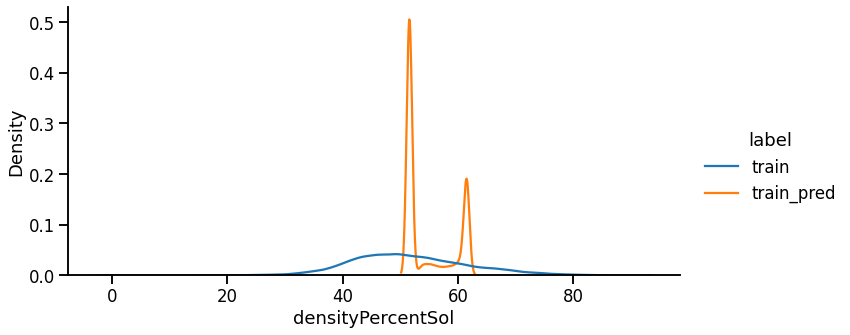

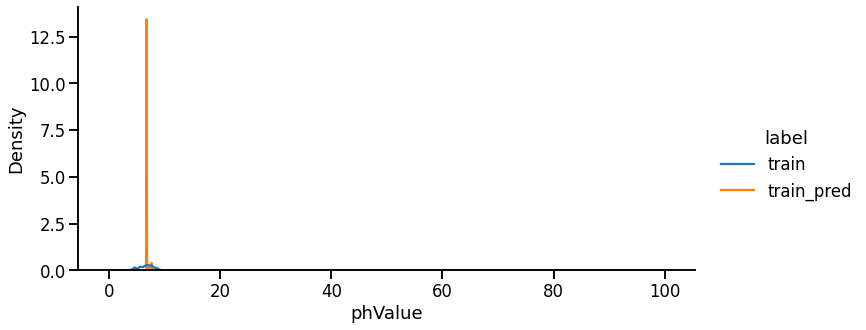

In [49]:
for feature in [
    'residueCount','resolution','structureMolecularWeight',
    'crystallizationTempK','densityMatthews','densityPercentSol','phValue'
    ]:
  sns.displot(
      data=df_train_final,
      x=feature,
      hue='label',
      kind='kde',
      common_norm=False,
      aspect=2,
    )
  print(
      '{} means for training data, original:{:.2f} <-> prediction:{:.2f}'.format(
          feature,
          df_train_final[df_train_final['label'] == 'train'][feature].mean(),
          df_train_final[df_train_final['label'] == 'train_pred'][feature].mean()
      )
  )

The same analyses applied on training data is subjected on the testing subset. This is very curcial as this is data which is completely new to the neural network (unseen) data. The results show that, we still observe a similar trend seen with the training set as the predictions are close to the original values within ~5% deviation.

residueCount means for test data, original:795.59 <-> prediction:897.36
resolution means for test data, original:2.15 <-> prediction:2.26
structureMolecularWeight means for test data, original:98143.13 <-> prediction:112591.51
crystallizationTempK means for test data, original:291.31 <-> prediction:291.12
densityMatthews means for test data, original:2.68 <-> prediction:2.88
densityPercentSol means for test data, original:51.65 <-> prediction:54.89
phValue means for test data, original:6.80 <-> prediction:6.87


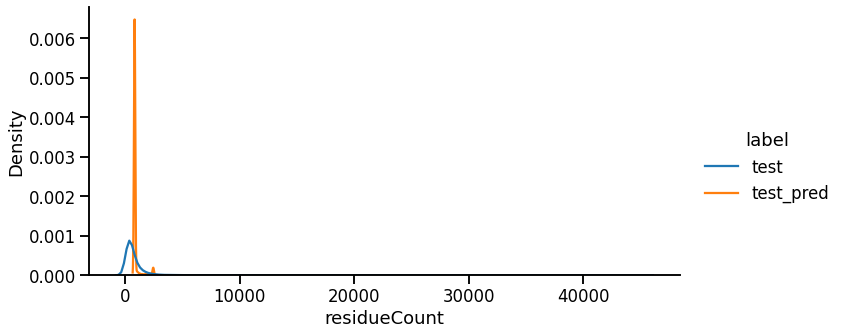

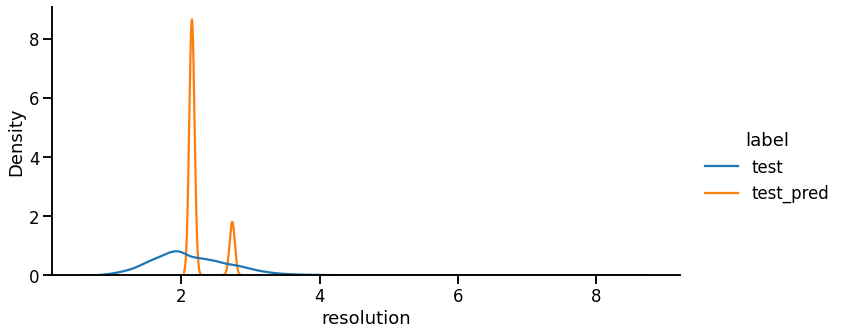

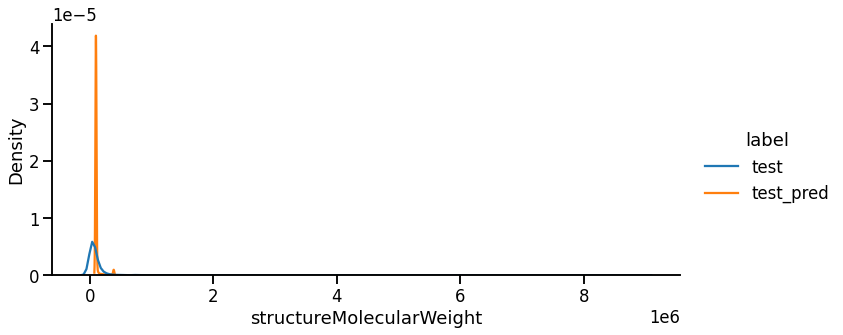

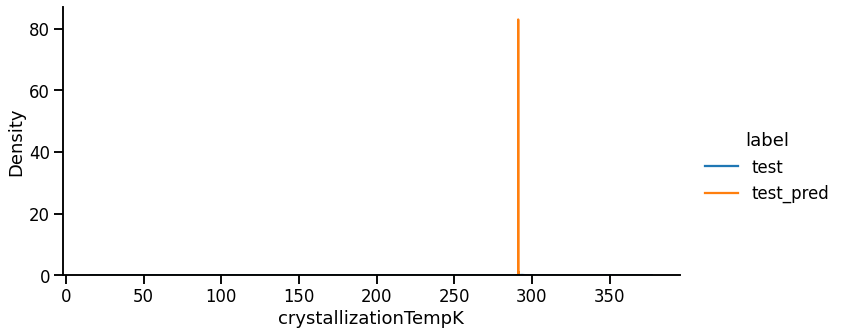

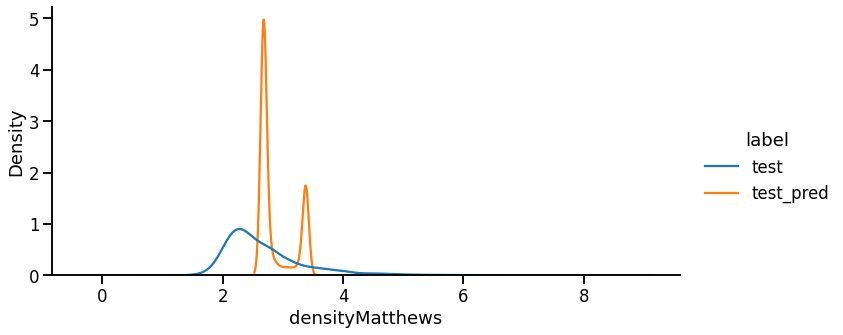

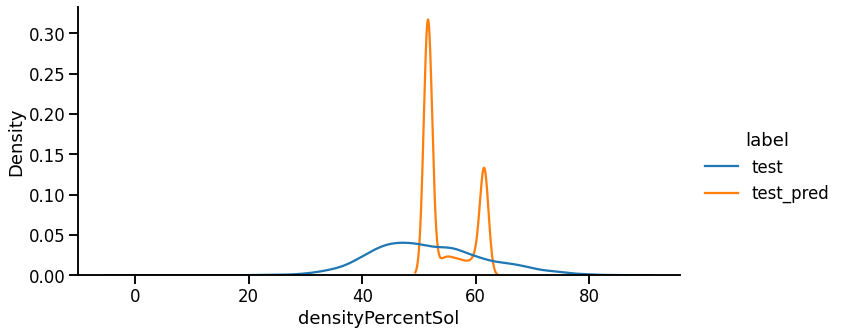

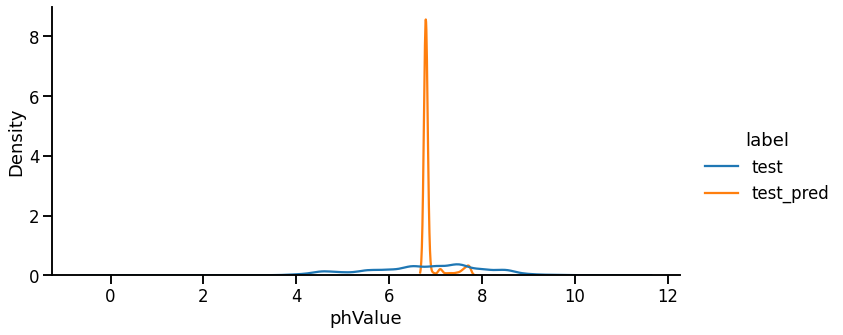

In [50]:
for feature in [
    'residueCount','resolution','structureMolecularWeight',
    'crystallizationTempK','densityMatthews','densityPercentSol','phValue'
    ]:
  sns.displot(
      data=df_test_final,
      x=feature,
      hue='label',
      kind='kde',
      common_norm=False,
      aspect=2,
    )
  print(
      '{} means for test data, original:{:.2f} <-> prediction:{:.2f}'.format(
          feature,
          df_test_final[df_test_final['label'] == 'test'][feature].mean(),
          df_test_final[df_test_final['label'] == 'test_pred'][feature].mean()
      )
    )

Overall the neural network treatment was successful and it captured the essence of the structural protein features strong enough to make predictions not so far from the originals. However one drawback seen from distributions is that predictions are not as diverse as the original data, meaning predictions are mostly centered on one or two regions whereas original data points are distributed across multiple values for each feature. Besides the drawback neural network was able to identify multiple classes which can not be easily comprehended from the distribution of original values. This is the strongest achievement of the autoencoder as it captures the fundamental details that are missed by human (by human observation). On the other hand, when the computational cost is considered the overall enhancement in classification compared to PCA is minimal. While for the current data set this might be true but, considering only 7 features in structural protein data, when the number of features are increased several fold, the power of autoencoders will shine more as the first two components of PCA could become very convoluted and several more components should be considered and additional techniques should be incorporated to further understand the data.


# Conclusion

Through my analysis of structural discovery protein data, we were able to utilize both machine learning, PCA and neural network techniques to gain new insights into several properties of the proteins. This study highlights the challenges of achieving results that resemble natural phenomena by comparing solution densities to crystal densities. By using machine learning techniques (k-means clustering, hierarchical clustering, DBSCAN) these results obtained show that only 26% of the experimental data points display naturally occurring behavior that captures the correct underlying biological fundamentals. Thus, I used PCA technique to better understand the data. PCA allowed me to identify key factors driving variation in the dataset and provided a simplified view of the underlying patterns and relationships. PCA analyses showed that the first three principal components can distinguish key protein features from each other and enabled me to cluster the protein labels based on these differences. 

In addition, by using a non-linear approach like neural network, I was able to accurately distinguish input features, highlighting its potential for learning complex patterns in protein structural discovery data. The results showed that the autoencoder learned the hidden characteristics of protein structural features and was able to reconstruct the features accurately. When compared to the distributions and the means of the original data, the features that were reconstructed from the autoencoder showed high overlap and indicated the existence of two separate clusters (multiple peaks in the distribution) of proteins in the dataset. This observation is intriguing as for future investigations to determine if there are indeed distinct groups of proteins provided their structural features. Overall, the results demonstrate the potential of both PCA and neural networks in analyzing complex protein data, and the insights gained from these techniques can provide valuable information for further research in the field.


# References
- “Structural Protein Sequences.” n.d. https://www.kaggle.com/datasets/shahir/protein-data-set. 
- Warren, Bertram Eugene. 1990. X-Ray Diffraction. Courier Corporation.
- Whittig, L. D., and W. R. Allardice. 1986. “X-Ray Diffraction Techniques.” Methods of Soil
Analysis: Part 1 Physical and Mineralogical Methods 5: 331362.
- Fausett, L. V. (2006). Fundamentals of neural networks: architectures, algorithms and applications. Pearson Education India.
- Haykin, S. (2009). Neural networks and learning machines, 3/E. Pearson Education India.
- SKLEARN.DECOMPOSITION.PCA. scikit. (n.d.). Retrieved February 28, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 